<h1>HW3</h1>

# Question 1
### (Bayes Theorem) Read the following example and complete the exercises 

Trolls Under the Bridge
1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:
1. TTGGG: 20% (E1)
2. TGGGG: 20% (E2)
3. GGGGG: 60% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

### 1.1 

#### What is the chance of the knight crossing the bridge safely?


The chance of the knight crossing the bridge safely is when he does not encounter a troll. In the event that he does not encounter a troll, he has a 60% chance of crossing the bridge safely.

### 1.2

#### Before crossing a bridge, a knight captures a troll. “I now have an 80% chance of crossing safely,” he reasons, “since only the case 20% had TTGGG (E1) now have TGGG is still a threat.”

#### Do you agree with him? Why?

I do not agree with the knight's thinking. Knowing that the knight captured a troll, this means that he is either at E1 or E2. This disregards E3 in the probability of him being safe. Now his chances of being safe will decrease to 1/3. This is because if he has captured a troll in E1, there is still another troll waiting to hit him. However, if he has captured a troll in E2, he will be safe since there is only one troll in E2. 

### 1.3

#### Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured 

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

#### Given the three events, E1, E2, and E3, under which two events the knight cannot cross safely after a troll was captured?

Even if the knight has captured a troll, he cannot cross the bridge safely under events E1 and E2 since there is still a troll in those events. 

### 1.4

#### Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured. 

Probability of one event given a troll captured: 

\begin{equation*}
P(A|B): E1  Given  Troll  Captured \\
P(B|A): Troll  Captured  Given  E1 \\
P(A): Under  Event  E1 \\
P(B): Captured  Troll \\
\end{equation*}

In [12]:
prior = 1/5
like = 2/5
marg = ((2/5)*(1/5))+((1/5)*(1/5))+((0/5)*(3/5))
post = like*prior/marg

0.6666666666666666

Probability of the other event given a troll captured: 

\begin{equation*}
P(A|B): E2  Given  Troll  Captured \\
P(B|A): Troll  Captured  Given  E2 \\
P(A): Under  Event  E2\\
P(B): Captured  Troll \\
\end{equation*}

In [13]:
prior = 1/5
like = 1/5
marg = ((2/5)*(1/5))+((1/5)*(1/5))+((0/5)*(3/5))
post = like*prior/marg

0.3333333333333333

### 1.5

#### What is the chance of the knight crossing safely?

The chance of the knight crossing safely given that he has captured a troll is 33%, which is the same probability as the probability of being at E2. This is because there is only one troll in E2, which gives him a safe path. The safety has drastically decreased due to the probability of being at E1. If he has captured a troll, there is still another troll waiting to hit him. 

#### Now looking back to 1.1, the probabilities were changed after assimilating data! 

# Question 2
### (Polynomial Fitting) Read the following example and complete the exercises 

Biological data always comes with errors that influence the intepretation of the data significantly. In this question, we will simulate data and see how noises affect the parameter estimation.

In [1]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random"])

    Updating registry at `C:\Users\choan\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\choan\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\choan\.julia\environments\v1.8\Manifest.toml`


In [2]:
import Distributions as di
import Plots
import Polynomials
import Random

In [3]:
using Distributions
using Plots
using Polynomials: Polynomial, fit, coeffs
using Random

### 2.1

1. Generate the independent variable x ranging from -10 to 10 with an increment of 1
2. Generate the dependent variable y_true using the equation y_true = x^2 + 3x - 2


In [4]:
x = -10:1:10
y_true = x.^2 .+ 3 .* x .- 2

21-element Vector{Int64}:
  68
  52
  38
  26
  16
   8
   2
  -2
  -4
  -4
  -2
   2
   8
  16
  26
  38
  52
  68
  86
 106
 128

### 2.2

1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed


In [5]:
n = Normal(0,10)
noise = rand(n, 21)
y_observed = y_true + noise

21-element Vector{Float64}:
  74.74518648054003
  60.33580651883715
  46.610407888128464
  22.099358614083883
  16.718453309045547
  14.306971041589389
   5.83349777539156
  -7.613960424374971
 -16.369784991632102
  -5.718621418984979
   1.6655777747206142
  -6.186932318078613
   1.548980566200484
  25.853696391481144
  21.495518070183607
  28.083382082526843
  52.23497443286598
  65.98457111162705
  80.9006697551145
  91.85419195417657
 120.59613185457162

### 2.3

#### Fit the data (x, y_observed) with a second order polynomial. 

1. Make a scatter plot of y_observed along x
2. Plot a line of y_true along x on the scatter plot
3. Plot a line of the fitted polynomial along x on the same plot

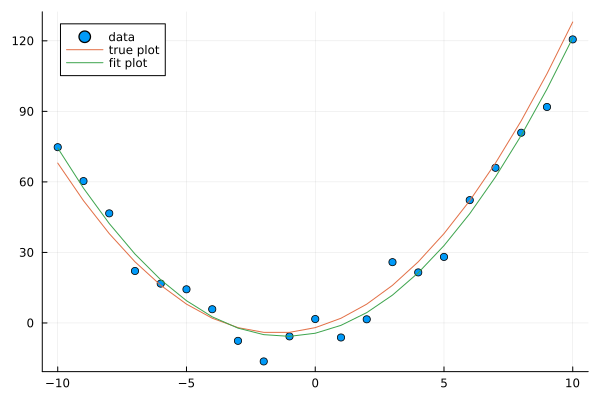

In [6]:
line_fit = fit(x,y_observed,2)
fit_coeff = coeffs(line_fit)
y_fit = fit_coeff[1] .+ fit_coeff[2] .* x .+ fit_coeff[3] .* x.^2
scatter(x,y_observed, label = "data")
plot!(x, y_true, label = "true plot")
plot!(x, y_fit, label = "fit plot")

### 2.4

1. Repeat 2.2 and 2.3 with a noise with a standard deviation of 50

In [7]:
n = Normal(0,50)
noise = rand(n, 21)
y_observed = y_true + noise

21-element Vector{Float64}:
  35.89309710305052
  41.01816578130233
 -35.652795067443805
  39.60429885799179
 -15.249650754356178
  22.58109931126655
  20.446172273299393
   3.9402044580613333
  16.746048552597017
   6.2311194204423686
 138.28985824425138
  16.196323109979957
 -92.02848901963898
 -31.830806463249928
 -13.348277025690237
  23.89628834788877
  69.62217922036982
  78.6404058169946
 156.59034473476584
  78.27595598702639
  16.872106336892173

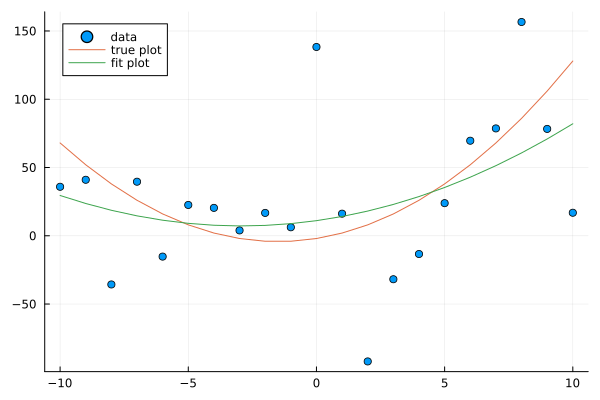

In [8]:
line_fit = fit(x,y_observed,2)
fit_coeff = coeffs(line_fit)
y_fit = fit_coeff[1] .+ fit_coeff[2] .* x .+ fit_coeff[3] .* x.^2
scatter(x,y_observed, label = "data")
plot!(x, y_true, label = "true plot")
plot!(x, y_fit, label = "fit plot")

2. Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why?

Compared to the plot in 2.3, the fit in 2.4 is further from the y_true because of the larger standard deviation. The larger standard deviation makes the data points stray from the y_true causing the fit to follow those data points. 

### 2.5

#### Repeat 2.2 and 2.3 with a tenth order polynomial fit


In [9]:
n = Normal(0,10)
noise = rand(n, 21)
y_observed = y_true + noise

21-element Vector{Float64}:
  63.34259508277347
  71.00524162619075
  29.46241255185126
  16.89138547295344
  30.984086787184197
  25.075819056635297
  -5.9160151066119075
 -10.635631617706341
  -7.846554062140256
 -18.2210315538086
   6.71646841852818
   0.44548483832678243
   1.5653088668527397
  16.20492515389886
  26.562983669934933
  32.703149474245805
  47.152543139434655
  82.73916147654415
  72.91828939283
 101.79416162514458
 120.63543590795825

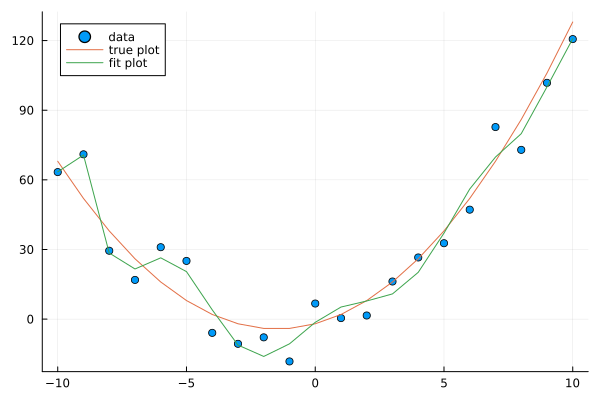

In [10]:
line_fit = fit(x,y_observed,10)
y_fit = line_fit.(x)
scatter(x,y_observed, label = "data")
plot!(x, y_true, label = "true plot")
plot!(x, y_fit, label = "fit plot")

### 2.6

1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.1
2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x


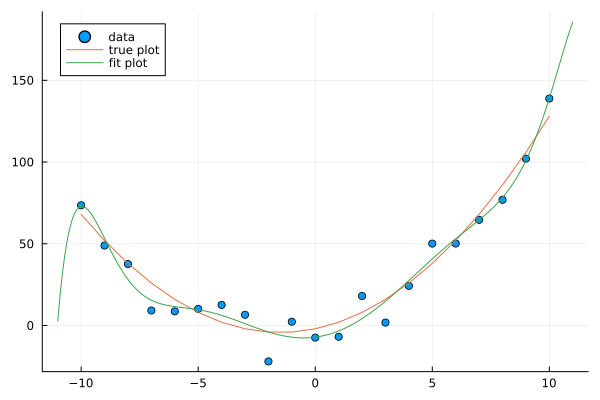

In [11]:
n = Normal(0,10)
noise = rand(n, 21)
y_observed = y_true + noise
line_fit = fit(x,y_observed,10)
x_fit = -11:0.1:11
y_fit = line_fit.(x_fit)
scatter(x,y_observed, label = "data")
plot!(x, y_true, label = "true plot")
plot!(x_fit, y_fit, label = "fit plot")

3. What do you observe in the plot? What is this phenomenon called?

The phenomenon presented in 2.6 is called overfitting as the fitted plot is almost tracing the data points.